In [12]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
train= pd.read_csv("C:/Users/hp/Downloads/663e2b6d54457_train_data_with_samplefeatures.csv")
batsman= pd.read_csv("C:/Users/hp/Downloads/663e2b548c98c_batsman_level_scorecard.csv")
bowler= pd.read_csv("C:/Users/hp/Downloads/663e2b2c60743_bowler_level_scorecard.csv")
matchdata= pd.read_csv("C:/Users/hp/Downloads/664389efa0868_match_level_scorecard.csv")

In [13]:
test= pd.read_csv("C:/Users/hp/Downloads/6644a1e287df6_test_data_with_samplefeatures.csv")

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
train.head(1)

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,...,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,Hl Ph,12634,Hl Ph,...,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.0,100.0,157.178571


In [16]:
train= train.drop(['venue', 'city','lighting','ground_id'], axis=1)

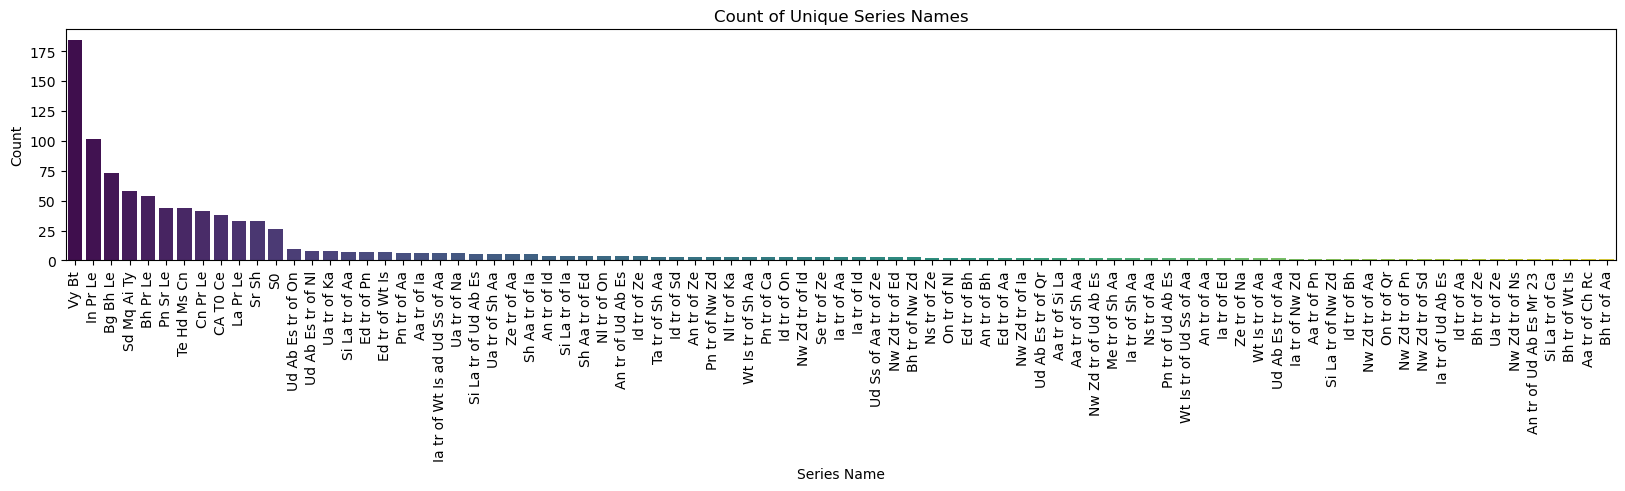

In [17]:
series_counts = train['series_name'].value_counts()
plt.figure(figsize=(20, 3))
sns.barplot(x=series_counts.index, y=series_counts.values, palette='viridis')
plt.xlabel('Series Name')
plt.ylabel('Count')
plt.title('Count of Unique Series Names')
plt.xticks(rotation=90)
plt.show()

In [18]:
small_series = series_counts[series_counts < 25].index
train['series_name'] = train['series_name'].apply(lambda x: 'others' if x in small_series else x)
train['series_name'].nunique()

13

In [19]:
mask = series_counts < 25
others_count = series_counts[mask].sum()
series_counts = series_counts[~mask]
series_counts = pd.concat([series_counts, pd.Series({'others': others_count})])

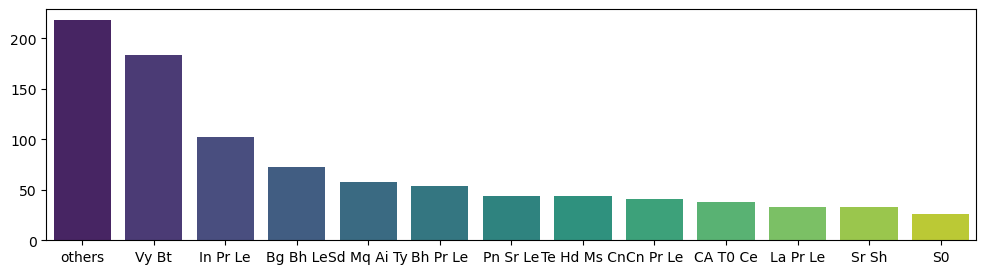

In [20]:
series_counts = series_counts.sort_values(ascending=False)
plt.figure(figsize=(12, 3))
sns.barplot(x=series_counts.index, y=series_counts.values, palette='viridis')
plt.show()